# GLOBAL HIGH-CASUALTY EVENT ANALYSIS
### Analysis of Islamic State-associated Attacks (2007-2020)


## Introduction

The Islamic State (ISIS) has been a prominent and devastating force in global terrorism since its emergence in the mid-2000s. Responsible for numerous high-profile attacks, ISIS has significantly impacted the political, social, and economic landscapes of multiple countries, particularly in the Middle East. Understanding the dynamics of ISIS-associated terrorist activities is essential for developing effective counter-terrorism strategies and mitigating the threats posed by such extremist groups.

This project conducts a comprehensive Exploratory Data Analysis (EDA) of terrorist attacks linked to ISIS from 2007 to 2020. Utilizing the Global Terrorism Database provided by the University of Maryland, this study goes into various aspects of ISIS's operations, including trends in attack frequency, target selection, and weapon usage across different countries. By focusing on these elements, the analysis aims to reveal patterns and shifts in ISIS's strategies over time, offering insights into their evolving tactics and objectives.

The primary objectives of this project are twofold:

1. **Target Vulnerability Analysis in Iraq:** Identify the most vulnerable types of targets for ISIS terrorist attacks in Iraq and examine how their attack strategies have evolved over the specified period. This involves assessing the frequency and severity of attacks against different target categories, such as private citizens, military personnel, and government institutions.

2. **Impact of Weapon Choice on Casualties:** Investigate how the selection of weaponry by ISIS influences the scale of attack outcomes in terms of casualties. Additionally, explore whether these impacts vary across different countries, highlighting regional differences in weapon preference and attack effectiveness.


---


## Question 1:
What are the most vulnerable types of targets for terrorist attacks in Iraq and how have attack strategies evolved over time?


In [ ]:
import pandas as pd
from pandas_datareader import wb
import numpy as np

### Data Gathering
# Load the dataset
isis_attacks_csv = pd.read_csv('/content/islamic_state.csv')
# Drop rows with any missing values
isis_attacks_csv = isis_attacks_csv.dropna()
######


### Data Manipulation
isis_attacks_csv['date'] = pd.to_datetime(isis_attacks_csv['date'])
# Selecting relevant columns for analysis
data = isis_attacks_csv[isis_attacks_csv['country_txt'] == 'Iraq'][['date', 'country_txt', 'attacktype1_txt', 'targtype1_txt', 'nkill', 'nwound']]
######


### Calculations
#Analyze
attacks_over_time = data.groupby([data['date'].dt.year, 'targtype1_txt']).size().unstack().fillna(0)

casualties_by_region = data.groupby(['country_txt', 'targtype1_txt']).agg({
    'nkill': 'sum',
    'nwound': 'sum'
}).reset_index()

casualties_by_region['total_casualties'] = casualties_by_region['nkill'] + casualties_by_region['nwound']
casualties_by_region['normalized_casualties'] = casualties_by_region['total_casualties'] / casualties_by_region['total_casualties'].max()
# Sorting the data to focus on the most vulnerable targets
casualties_by_region_sorted = casualties_by_region.sort_values('total_casualties', ascending=False)

######



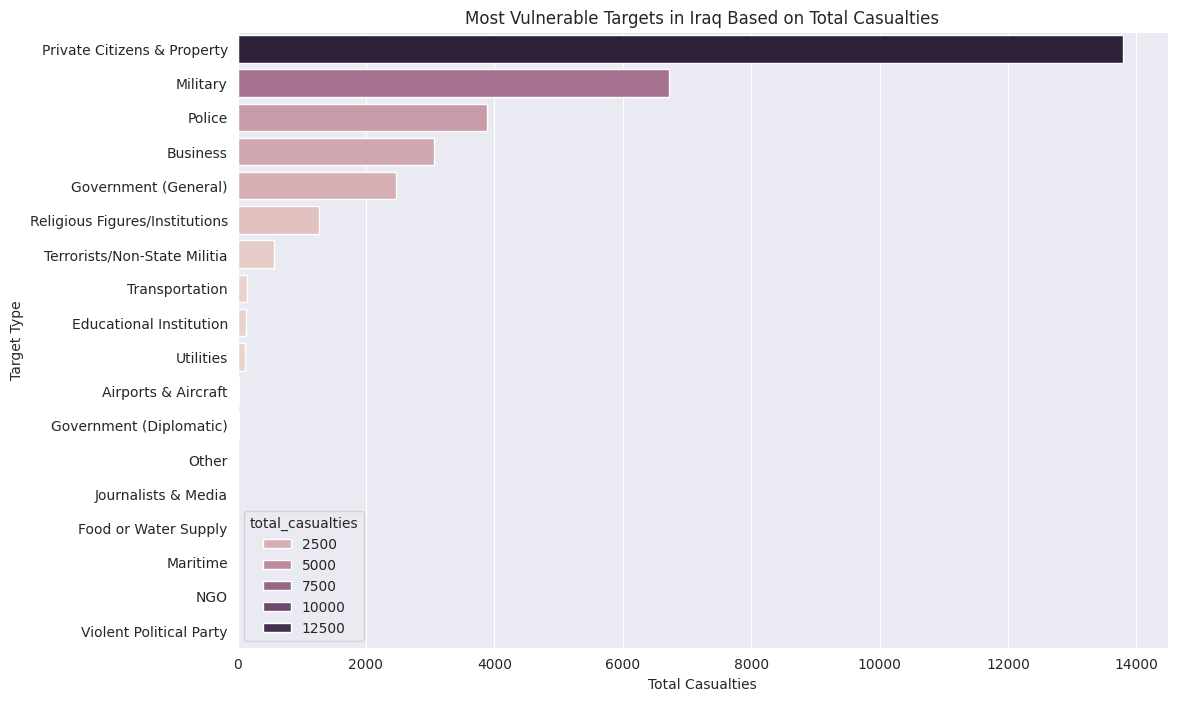

In [ ]:
# Bar chart for most vulnerable targets
plt.figure(figsize=(12, 8))
sns.barplot(x='total_casualties', y='targtype1_txt', data=casualties_by_region_sorted, hue='total_casualties')#,palette='viridis')
plt.title('Most Vulnerable Targets in Iraq Based on Total Casualties')
plt.xlabel('Total Casualties')
plt.ylabel('Target Type')
plt.show()

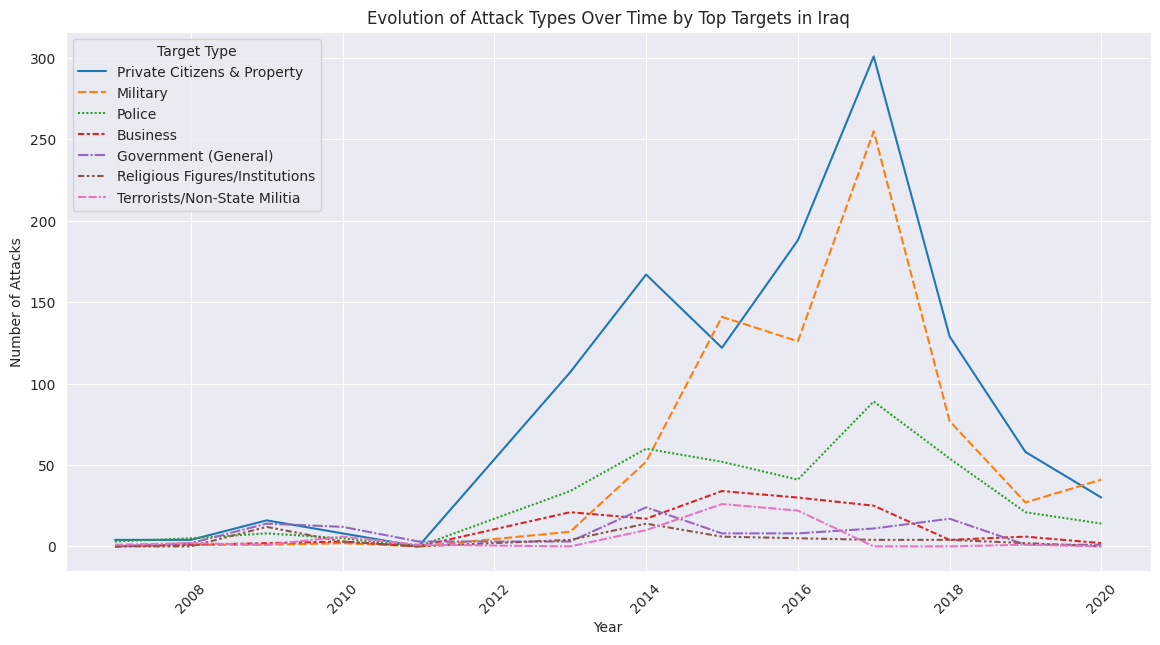

In [ ]:
specific_targets = [
    'Private Citizens & Property', 'Military', 'Police',
    'Business', 'Government (General)',
    'Religious Figures/Institutions', 'Terrorists/Non-State Militia'
]
filtered_attacks_over_time = attacks_over_time[specific_targets]

# Line Graphs for attack patterns over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_attacks_over_time)
plt.title('Evolution of Attack Types Over Time by Top Targets in Iraq')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Target Type')
plt.show()

The visualizations I picked provide an overview of the vulnerability of various target types to terrorist attacks in Iraq and show the evolution of these attack strategies over time.

The Bar plot indicates that Private Citizens & Property are the most frequently targeted group, with a significantly higher number of total casualties compared to other categories. This is followed by Military and Police, suggesting that non-combatants and security forces are primary targets for terrorist activities. Targets like Business, Government, and Religious Figures/Institutions also show considerable casualty figures, reflecting their strategic importance to terrorist objectives. The targeting of Terrorists/Non-State Militia further highlights the internal conflicts and struggles for dominance among various factions.

The Lineplot depicts the evolution of attack types over time in Iraq, showing a significant increase in attacks on Private Citizens & Property starting around 2013, peaking sharply in 2016 and then declining. This trend could be associated with periods of intensified conflict and territorial control efforts. Similarly, attacks on Military and Police targets spiked during the same period, likely reflecting the heightened confrontations with Iraqi security forces. The Business sector and Government experienced fluctuations in attacks, which might correlate with strategic shifts in targeting economically and politically significant structures to disrupt normalcy and governance.

Over the years, the strategy has transitioned from a relatively lower frequency of attacks in the early 2000s to a rapid increase post-2010, peaking around 2016. The decline post-2016 might be attributed to the loss of territorial control by terrorist groups, increased security measures, and international interventions. The focus on Private Citizens & Property throughout suggests a persistent intention to create social disruption and fear, while the targeting of Military and Police points to an objective of weakening the state's security.

Trends:
The reasons behind the fluctuation in terrorist activity in Iraq from 2011 to 2020 involve a range of political, social, and military factors. Here's what I found:

* **2011 (Dip)**: The United States gradually reduced its military presence in Iraq, formally completing its withdrawal in December 2011.

* **2014 (Peak)**: ISIS emerged as a significant force in 2014. The group took advantage of the withdrawal of US troops from Iraq and Sunni anger at the sectarian policies of its Shia-led government.

* **2015 (Dip)**: Bombings and other atrocities were a daily event in Iraq in 2015, as the country was in a state of war. The scale of attacks may have dipped due to international counter-terrorism efforts.

* **2016-2017 (Rising to all-time high)**: ISIS continued to conduct operations on a smaller scale in the North and West, including rural areas with limited presence of the Iraqi Security Forces (ISF). The group sought to reestablish control in different provinces.

* **2018-2020 (Falling to all-time low)**: ISIS's territorial defeat led to a decline in the group's activities. The decline in terrorist activity during this period can be attributed to successful counter-terrorism efforts and the group's loss of territory.


## Question 2
How does the choice of weaponry impact the scale of attack outcomes in terms of casualties, and does this vary across different countries?

In [ ]:
import pandas as pd
import numpy as np

### Data Gathering
# Load the dataset from a CSV file
isis_attacks_csv = pd.read_csv('/content/islamic_state.csv')
isis_attacks_csv = isis_attacks_csv.replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicles') #simplify


### Data Manipulation
isis_attacks_csv['nkill'].fillna(0, inplace=True)
isis_attacks_csv['nwound'].fillna(0, inplace=True)

# Selecting relevant columns
columns_of_interest = ['iyear', 'imonth', 'iday', 'country_txt', 'attacktype1_txt', 'weaptype1_txt', 'nkill', 'nwound']
attacks_data = isis_attacks_csv[columns_of_interest]

### Calculations
# Calculate the total number of attacks per country
attacks_per_country = attacks_data['country_txt'].value_counts()

# Calculate total casualties (killed + wounded) for each attack
attacks_data['total_casualties'] = attacks_data['nkill'] + attacks_data['nwound']




<ipython-input-171-af20d09b7019>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacks_data['total_casualties'] = attacks_data['nkill'] + attacks_data['nwound']


<ipython-input-175-9be313ea20ec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_casualties_by_weapon.values, y=total_casualties_by_weapon.index, palette='coolwarm')


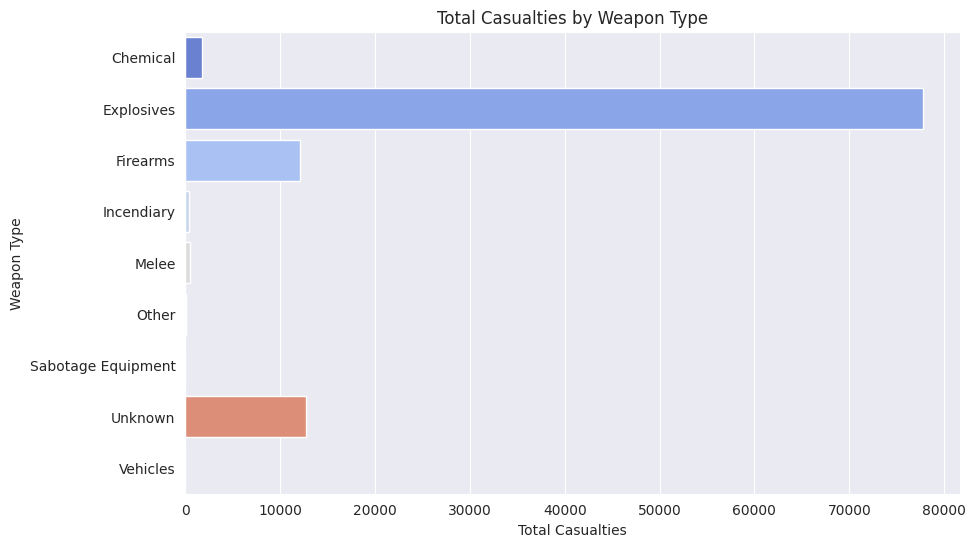

In [ ]:
# Group by weapon type and summarize total casualties
total_casualties_by_weapon = attacks_data.groupby('weaptype1_txt')['total_casualties'].sum()

# Visualize total casualties by weapon type
plt.figure(figsize=(10, 6))
sns.barplot(x=total_casualties_by_weapon.values, y=total_casualties_by_weapon.index, palette='coolwarm')
plt.title('Total Casualties by Weapon Type')
plt.xlabel('Total Casualties')
plt.ylabel('Weapon Type')
plt.show()

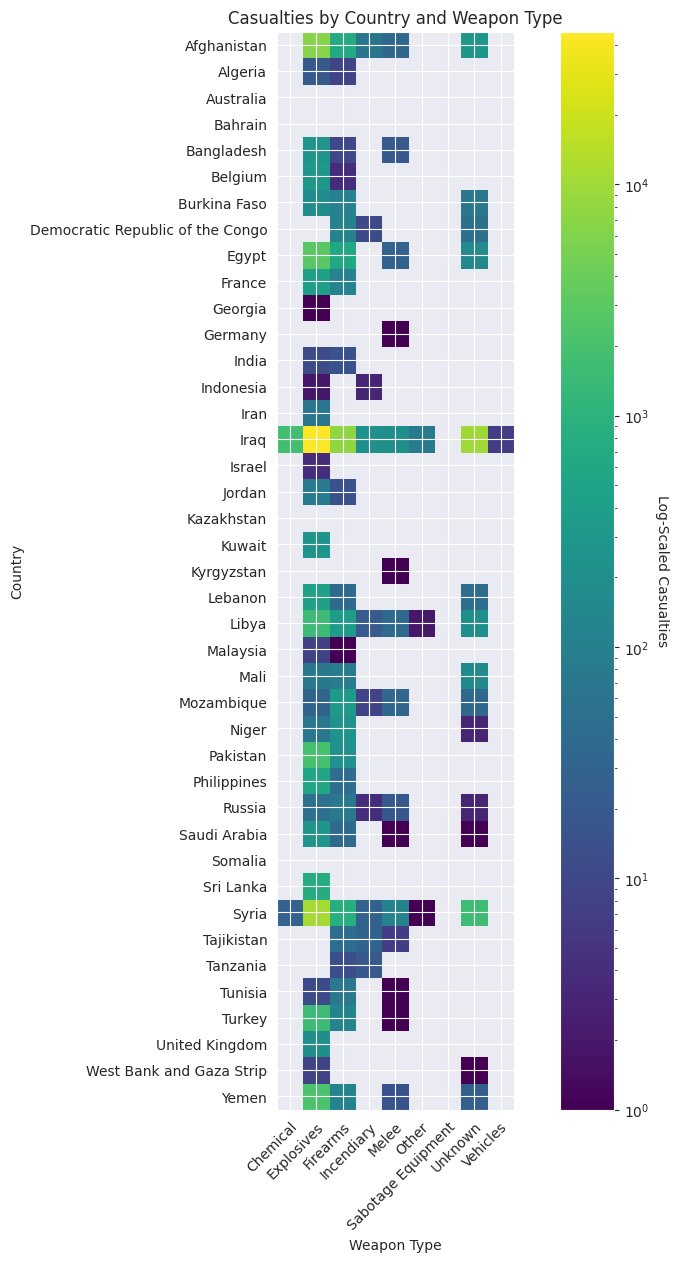

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


#### Had to figure out imshow because i didn't like the look of sns.heatmap
# aggfunc - Pandas will sum up all the total_casualties values.
casualties_by_country_and_weapon = attacks_data.pivot_table(values='total_casualties', index='country_txt', columns='weaptype1_txt', aggfunc='sum', fill_value=0)
fig, ax = plt.figure(figsize=(12, 14)), plt.axes()
im = ax.imshow(casualties_by_country_and_weapon, cmap='viridis', norm=LogNorm())

# Color bar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Log-Scaled Casualties', rotation=-90, va="bottom")

# Setting the labels for the rows and columns
ax.set_xticks(np.arange(casualties_by_country_and_weapon.shape[1]))
ax.set_yticks(np.arange(casualties_by_country_and_weapon.shape[0]))
ax.set_xticklabels(casualties_by_country_and_weapon.columns)
ax.set_yticklabels(casualties_by_country_and_weapon.index)

# Tick labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title('Casualties by Country and Weapon Type')
ax.set_xlabel('Weapon Type')
ax.set_ylabel('Country')

plt.show()

The graphs I picked provide data on the impact of different weapon types on the scale of casualties in terrorist attacks and how these impacts vary across various countries.

The Barplot shows that explosives are the most lethal weapon type, responsible for the highest number of casualties by a significant margin. This indicates that explosives are preferred for their destructive capacity and ability to inflict mass casualties. Firearms follow as the second most deadly weapon type, though they account for far fewer casualties than explosives, suggesting their use in more targeted attacks. The categories for chemical, incendiary, and vehicle-related attacks show lower figures, showing their less frequent use/lower lethality compared to explosives and firearms.

The imshow heatmap provides a detailed breakdown of casualties by weapon type across various countries. It illustrates a pattern where explosives consistently cause high casualties in multiple regions, including Iraq, Afghanistan, and Syria, reinforcing the data from the first graph. In countries like Iraq, the usage of explosives and firearms is prominently higher than in other regions, which correlates with the past conflicts and the operational tactics of terrorist groups there. Interestingly, some countries like India and Pakistan also show significant casualties from firearms, pointing to different tactical preferences or availability of weapons.

The global perspective in the imshow visualization depicts the variability in weapon impact across different contexts. For instance, in European countries like Belgium and France, the usage of firearms and explosives reflects specific incident types, such as coordinated attacks and bombings, which have led to high-profile attacks with substantial casualties.

Overall, the data reveals that explosives are the most commonly used and most deadly weapon type in terrorist attacks globally, capable of causing widespread damage and loss of life. The choice of weaponry clearly influences the scale of attack outcomes, with significant variations across different countries that reflect local contexts, the availability of weapons, and strategic choices by terrorist groups. The consistent pattern of high casualties from explosives across multiple countries suggests a common strategic preference for maximizing impact.